### Sea Level Rise in New York City

Data Bootcamp Final Project (Spring 2016)

by Daniel Jung (dmj307@stern.nyu.edu)

** About This Project **

The levels of ocean surfaces (henceforth referred to as the 'sea level') have been observed to be rising around the world. While sea levels are known to fluctuate due to natural processes, researchers have found a steady increase in the sea level during the past 100 years that is anomylous to historical natural fluctuations. This project will use historical monthly sea level data from the National Oceanic and Atmospheric Association in order to estimate the rate of sea level rise. Because sea levels are known to vary throughout localities, this project will focus on the sea level around New York City. We will then use our calculated rate to estimate how long it will take for key areas around the City to be flooded.

** About Sea Levels **

The sea level refers to the current level at which the ocean surface lies, above which land elevations can be measured. This means that the sea level will always have a level of elevation of 0. Sea levels are generally measured in millimeters relative to the point of measurement. For example, if the sea level lies 2mm below the measurement gauge, the measurement will be -2mm. If the sea level likes 5 mm below the measurement gauge, the measurement will be 5mm. A sea level of 0mm means that the sea is at the same level as where the measurement gauge sits.

Our measurements are measured from the NOAA's station at The Battery in New York City. Our dataset begins in the first month of 1850 and goes all the way through to the present day, recording measurements from the high confidence interval, the low confidence interval and the average trend, labeled ' Linear_Trend' in our dataset. Our dataset measures the sea level in meters relative to the station. The first measurement in January 1850 has an average trend of -0.406m, that is, -0.406m or 406mm below the station's measuring gauge.

** About Elevation **

Elevation is often measured in feet or meters. Our dataset is obtained from NYC Open Data and measures the elevation at certain points in New York City in feet. It is important to remember that elevation is measured relative to the sea level, so the sea level is always at 0ft.

** Packages Used **

For this project, we will be using the Python package, Pandas, for data manipulation. We will also be using NumPy for calculations and MatPlotLib for our graphics. We will also use %matplotlib inline to ensure that our graphics appear on this notebook:

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Calculating Rate of Sea Level Rise

We obtained our CSV dataset on sea levels from the NOAA at the following link: https://tidesandcurrents.noaa.gov/sltrends/downloadMeanSeaLevelTrendsCSV.htm;jsessionid=2D46B64BEEFE3215B19644B8B15DD432?stnid=8518750

This dataset, as mentioned before, measures the sea level in meters from The Battery in Lower Manhattan every month beginning January 1850. Three measurement figures are given: The higher confidence interval, the lower confidence interval, and the linear trend, which is found by averaging the higher and lower confidence intervals. For this project, we are interested in the linear trend levels.

Before we calculate our rate of sea level rise, we want to see if the rate at which the sea level has increased has changed throughout history (that is, if the sea level rise is accelerating or deccelerating). We can do this using two methods. First, we can simply plot the linear trend from the data and see if there is a curve in the line. We can also find acceleration manually by dividing our dataset into sections:
    - Section 1: January 1850 - December 1900
    - Section 2: January 1901 - December 1950
    - Section 3: January 1951 - December 1992
    - Section 4: January 1993 - February 2016
These section have been determined according to what many climate scientists have found to be significantly different 'stages' of sea level rise. Section 1 represents pre-industrial levels, Section 2 represents early stage post-industrial levels. 1992 is considered a significant year to climate scientists as this is the year when the global consensus on climate change and sea level rise became mainstream and led to a large amount of climate-related studies being published as well as large-scale initiatives launched to combat climate change and its effects. Section 3 will therefore run from post-industrial levels to 1992, and section 4 will run from 1992 to the present day.

In [12]:
# Importing the CSV link and assigning the dataset to the variable, 'clvl'
url1 = 'https://tidesandcurrents.noaa.gov/sltrends/downloadMeanSeaLevelTrendsCSV.ht'
url2 = 'm;jsessionid=D79899A1D9FCE54F6DC6A107F9439C5D?stnid=8518750'
url = url1 + url2
clvl = pd.read_csv(url)

# Creating the four section by slicing the dataset
t1 = clvl[:612]
t2 = clvl[612:1212]
t3 = clvl[1212:1716]
t4 = clvl[1716:1994]

# Calculating the trends for each section; We calculate the trend from difference as our data represents 
# Note: In this dataset the column label Linear_Trend is preceded by a black space so we must use ' Linear_Trend'
# when calling the data.
dif1 = clvl[' Linear_Trend'][611] - clvl[' Linear_Trend'][0]
dif2 = clvl[' Linear_Trend'][1211] - clvl[' Linear_Trend'][612]
dif3 = clvl[' Linear_Trend'][1715] - clvl[' Linear_Trend'][1212]
dif4 = clvl[' Linear_Trend'][1993] - clvl[' Linear_Trend'][1716]

trend1 = dif1 / len(t1[' Linear_Trend'])
trend2 = dif2 / len(t2[' Linear_Trend'])
trend3 = dif3 / len(t3[' Linear_Trend'])
trend4 = dif4 / len(t4[' Linear_Trend'])

In [13]:
# The results
print(trend1, trend2, trend3, trend4)

0.000235294117647 0.000236666666667 0.000236111111111 0.000237410071942


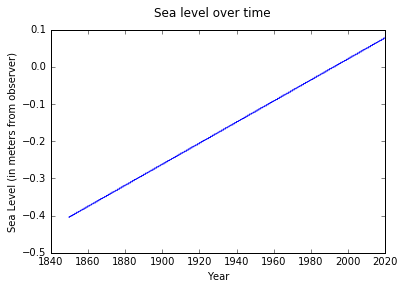

In [14]:
# Plotting Linear_Trend
clvl = clvl.set_index(['Year'])
plt.plot(clvl.index, clvl[' Linear_Trend'])
plt.suptitle('Sea level over time', fontsize = 12)
plt.ylabel('Sea Level (in meters from observer)', fontsize = 10)
plt.xlabel('Year', fontsize = 10)

Cutting the data to graph results from 1950 to the present day:

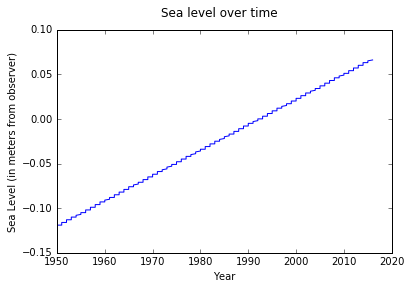

In [29]:
#newclvl = clvl.set_index(['Year'])
newclvl = clvl[1200:1994]
plt.plot(newclvl.index, newclvl[' Linear_Trend'])
plt.suptitle('Sea level over time', fontsize = 12)
plt.ylabel('Sea Level (in meters from observer)', fontsize = 10)
plt.xlabel('Year', fontsize = 10)

Both methods sufficiently show that, while there appears to be a steady rise in the sea level from the time the data collection began to the present day, there appears to be no significant acceleration or deceleration in the rate. It would therefore be appropriate to use a single rate when forecasting future sea level rise. Our second graphic attempts to zoom in on the past 50 years of data to see if a significant change in slope can be observed and there appears to be none.

We will calculate the single rate using the entire dataset from January 1850 to February 2016:

In [21]:
clvl2 = clvl.reset_index()
total = clvl2[:1994]
diff = clvl2[' Linear_Trend'][1993] - clvl2[' Linear_Trend'][0]
rate = diff / len(total[' Linear_Trend'])
rate

0.00023620862587763291

We obtained a rate of 0.2362mm per month, or roughly 2.8344mm per year. Because our elevation data for Part 2 is expressed in feet, we must convert this rate into feet.

Doing this gives us a rate of **0.0007750 ft per month** or **0.009300 ft per year**.

## Part 2: How Long Until Flooding?

We obtained our CSV dataset on elevation from NYC Open Data at the following link:
https://data.cityofnewyork.us/api/views/9uxf-ng6q/rows.csv?accessType=DOWNLOAD

This dataset contains thousands of geographical locations, identified by geographic coordinates and their corresponding elevation, measured in feet.

Using the rate we calculated in Part 1, we will determine how long it will take for seven key areas of the City to flood. These seven key areas were chosen to be:
    1. The Battery
    2. New York Stock Exchange building
    3. Times Square
    4. Brooklyn Navy Yards
    5. LaGuardia Airport
    6. John F. Kennedy Airport
    7. Coney Island
The above locations were chosen because they cover a large area of the City and are of cultural or economic importance.

First we want to identify the geographical coordinates on the CSV file that correspond to our chosen locations. We will do this by creating a loop to search through the file for coordinates that match or are very close to coordinates that we will find through a search engine. Then, having obtained these coordinates, we will take their corresponding elevation data to find how high the sea must rise in order to flood that location.

In [ ]:
# Importing the CSV link for our elevation data into a variable called 'elev'
eurl = 'https://data.cityofnewyork.us/api/views/9uxf-ng6q/rows.csv?accessType=DOWNLOAD'
elev = pd.read_csv(eurl)

# Creating a loop to search the dataframe for our coordinates
is_in = False
# Where 'x' is the rough coordinate found through a search engine
coord = 'x'

for item in elev:
    if coord in elev:
        is_in = True
        print(Year, Month)

The elevation for our chosen seven coordinates are as follows:
    1. The Battery - 7.858 ft
    2. New York Stock Exchange building - 17.609 ft
    3. Times Square - 53.503 ft
    4. Brooklyn Navy Yards - 28.370 ft
    5. LaGuardia Airport - 5.724 ft
    6. John F. Kennedy Airport - 7.200 ft
    7. Coney Island - 7.924

In [25]:
# Calculating how long it will take for the sea level to reach each elevation
# Using a simple mathematical script to convert a list of the seven elevations
elevations = [7.858, 17.609, 53.503, 28.370, 5.724, 7.200, 7.924]

for i in elevations:
    timeinmonths = i / 0.0007750
    print(timeinmonths)

10139.354838709678
22721.290322580648
69036.12903225806
36606.45161290323
7385.806451612903
9290.322580645161
10224.51612903226


Here are our results:
    1. The Battery - 7.858 ft; will take 10139 months or 845 years
    2. New York Stock Exchange building - 17.609 ft; will take 22721 months or 1893 years
    3. Times Square - 53.503 ft; will take 69036 months or 5755 years
    4. Brooklyn Navy Yards - 28.370 ft; wil take 36606 months or 3050 years
    5. LaGuardia Airport - 5.724 ft; will take 7385 months or 615 years
    6. John F. Kennedy Airport - 7.200 ft; will take 9290 months or 774 years
    7. Coney Island - 7.924; will take 10224 months or 852 years

## Conclusion

Our findings clearly show that there is a steady rise in the sea level that has existed since or before 1850. However, it is also quite surprisinging to see that there does not appear to be a significant change in the rate of sea level rise since 1850 and that the rise has been uniformly linear.

We found that:
    - The sea level in New York City is rising at about 0.2362 millimeters per month or 0.0007750 feet per month
    - This is equivalent to about 2.8344 millimeters per year or 0.009300 feet per year
    - At this rate, the sea level is expected to rise by 0.3131 ft by 2050
    - It will take more than 500 years for the lowest lying areas of the city to flood at this rate

While the threat of flooding is still realistic, our findings show that the city is not at risk of major flooding by 2050 as was previously thought. These findings, however, go against many major publications that argue that 1) The rate of sea level rise is increasing and 2) Parts of New York City are at risk of flooding as soon as 50-100 years from now.

This discrepancy in findings is most likely due to the fact that our dataset only begins collecting data from 1850. Further investigation revealed that many climate researchers use sources that infer the sea level from as much as thousands of years ago when calculating their figures for sea level rise acceleration. Because we do not have access to a dataset that incorporates these historic geographical findings (our dataset contains only direct measurements from the NOAA's station), our rates of change from 1850 are likely to be much less dramatic and noticeable.

## Sources

*For the technology required in this project, we used Spyder running Python 3.5. We also used the Python packages, Pandas, NumPy and MatPlotLib. In addition, we also used the information and data sources cited below.*

** Information Sources **

Information on how sea level is measured: http://www.global-greenhouse-warming.com/measuring-sea-level.html

Information on how elevation is measured: http://www.maps-gps-info.com/how-elevation-is-determined.html

Information on sea level acceleration: http://ocean.nationalgeographic.com/ocean/critical-issues-sea-level-rise/;
https://judithcurry.com/2016/02/23/is-sea-level-rise-accelerating/

** Data Sources **

Sea level data (from NOAA): https://tidesandcurrents.noaa.gov/sltrends/downloadMeanSeaLevelTrendsCSV.htm;jsessionid=2D46B64BEEFE3215B19644B8B15DD432?stnid=8518750

Elevation data (from NYC Open Data): https://data.cityofnewyork.us/api/views/9uxf-ng6q/rows.csv?accessType=DOWNLOAD